<style>
*
{
	text-align: justify;
	line-height: 1.5;
	font-family: "Arial", sans-serif;
	font-size: 12px;
}

h2, h3, h4, h5, h6
{
	font-family: "Arial", sans-serif;
	font-size: 12px;
	font-weight: bold;
}
h2
{
	font-size: 14px;
}
h1
{
	font-family: "Wingdings", sans-serif;
	font-size: 16px;
}
</style>

## Statistical Analysis of Bovine Tuberculosis

<!--
import data_analytics.github as github
print(github.create_jupyter_notebook_header("markcrowe-com", "agriculture-data-analytics", "notebooks/notebook-2-02-eda-bovine-tuberculosis.ipynb", "master"))
-->
<table style="margin: auto;"><tr><td><a href="https://mybinder.org/v2/gh/markcrowe-com/agriculture-data-analytics/master?filepath=notebooks/notebook-2-02-eda-bovine-tuberculosis.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></td><td>online editors</td><td><a href="https://colab.research.google.com/github/markcrowe-com/agriculture-data-analytics/blob/master/notebooks/notebook-2-02-eda-bovine-tuberculosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></td></tr></table>

### Objective

The objective is to provide a Statistical Analysis of the 'bovine-tuberculosis-eda-output.csv' artifact</a>.  

### Academic Objective

- Analyse the variables in your dataset(s) and use appropriate inferential statistics to gain insights on possible population values (e.g., if you were working with international commerce, identify the average/variance exportation yearly/quarterly in the appropriate currency).  

- Undertake research to find similarities between some countries against Ireland and apply parametric and non-parametric inferential statistics techniques to compare them (e.g., analysis of variance, t-test, Wilcoxon test, among others).  

- Use the outcome of your analysis to deepen your research. Indicate the challenges you faced in the process.  

- You are expected to use at least 5 different inferential statistics techniques.  

- Use of descriptive statistics and appropriate visualizations are required to explain the scenario and justify the chosen models performed.  

- All your calculations and reasoning behind your models must be documented in the report and/or the appendix.  

### Setup

Import required third party Python libraries, import supporting functions and sets up data source filepaths.

In [1]:
# Local
#!pip install -r script/requirements.txt --quiet --user
# Remote option
#!pip install -r "https://github.com/markcrowe-com/data-analytics-project-template/blob/master/notebooks/script/requirements.txt?raw=true" --quiet --user

In [2]:
from agriculture_data_analytics.project_manager import *
from agriculture_data_analytics.dataframe_labels import *
from data_analytics.graphs import display_caption
from matplotlib import rcParams
from pandas import DataFrame
import data_analytics.github as github
import data_analytics.exploratory_data_analysis as eda
import data_analytics.exploratory_data_analysis_reports as eda_reports
import numpy
import os
import pandas
import matplotlib.pyplot as pyplot
import scipy
import seaborn
import scipy.stats as stats
import sklearn.preprocessing as preprocessing 

In [3]:
artifact_manager = ProjectArtifactManager()
asset_manager = ProjectAssetManager()

In [4]:
artifact_manager: ProjectArtifactManager = ProjectArtifactManager()
asset_manager: ProjectAssetManager = ProjectAssetManager()
artifact_manager.is_remote = asset_manager.is_remote = True
github.display_jupyter_notebook_data_sources(
    [artifact_manager.get_county_bovine_tuberculosis_eda_filepath()])
artifact_manager.is_remote = asset_manager.is_remote = False

https://github.com/markcrowe-com/agriculture-data-analytics/artifacts/county-bovine-tuberculosis-eda-output.csv?raw=true


#### Create Data Frames

In [5]:
filepath: str = artifact_manager.get_county_bovine_tuberculosis_eda_filepath()
county_bovine_tuberculosis_dataframe: DataFrame = pandas.read_csv(filepath)

In [6]:
county_bovine_tuberculosis_dataframe.head()

,Year,Veterinary Office,Animal Count,Herd Incidence Rate,Restricted Herds at end of Year,Restricted Herds at start of Year,Herds Tested,Herds Count,Reactors per 1000 Tests A.P.T.,Reactors to date,Tests on Animals
0,2010,Carlow,86258.0,4.02,28.0,52.0,1295.0,1353.0,1.14,124.0,108584.0
1,2010,Cavan,202119.0,5.32,124.0,257.0,4832.0,4915.0,3.13,981.0,313822.0
2,2010,Clare,237260.0,5.71,175.0,350.0,6134.0,6282.0,5.05,1947.0,385705.0
3,2010,Cork North,462707.0,4.43,119.0,259.0,5849.0,5986.0,1.62,1078.0,664648.0
4,2010,Cork South,417478.0,6.30,216.0,385.0,6107.0,6310.0,2.72,1592.0,586105.0


Statistics of the columns

In [7]:
county_bovine_tuberculosis_dataframe.describe()

,Year,Animal Count,Herd Incidence Rate,Restricted Herds at end of Year,Restricted Herds at start of Year,Herds Tested,Herds Count,Reactors per 1000 Tests A.P.T.,Reactors to date,Tests on Animals
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,2015.000000,217035.561129,4.478715,82.159875,149.084639,3871.730408,3936.532915,2.131755,613.275862,297525.912226
std,3.167246,121124.166952,2.203510,46.337117,85.249518,2426.144887,2451.393564,1.317926,430.081935,165632.952545
min,2010.000000,19646.000000,1.390000,12.000000,18.000000,325.000000,344.000000,0.290000,31.000000,24987.000000
25%,2012.000000,104619.000000,2.855000,44.500000,83.500000,2345.500000,2368.000000,1.345000,265.500000,139006.500000
50%,2015.000000,218207.000000,4.100000,75.000000,139.000000,3346.000000,3415.000000,1.870000,533.000000,294841.000000
75%,2018.000000,283702.000000,5.360000,109.500000,199.500000,5394.500000,5484.000000,2.525000,887.500000,397599.500000
max,2020.000000,617851.000000,15.720000,263.000000,463.000000,11639.000000,11796.000000,9.640000,2999.000000,879841.000000


### Distribution of Herd Incidence Rate

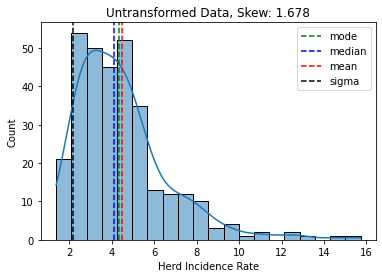

In [8]:
sigma = county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE].std()
mean = county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE].mean()
median = county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE].median()
mode = county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE].mode().to_numpy()

pyplot.title(f'Untransformed Data, Skew: {stats.skew(county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE]):.3f}')
seaborn.histplot(county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE], kde=True)
pyplot.axvline(mode, linestyle='--', color='green', label='mode')
pyplot.axvline(median, linestyle='--', color='blue', label='median')
pyplot.axvline(mean, linestyle='--', color='red', label='mean')
pyplot.axvline(sigma, linestyle='--', color='black', label='sigma')
pyplot.legend();

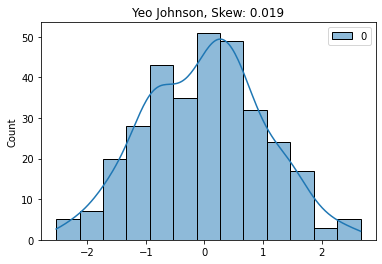

In [9]:
#Yeo-Johnson
power_transformer = preprocessing.PowerTransformer()
ptd = power_transformer.fit_transform(county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE].to_numpy().reshape(-1,1))
pyplot.title(f'Yeo Johnson, Skew: {stats.skew(ptd.squeeze()):.3f}')
seaborn.histplot(ptd, kde=True);

### Central Tendency

In [10]:
rcParams['figure.figsize'] = 13, 6  # Set the graph size

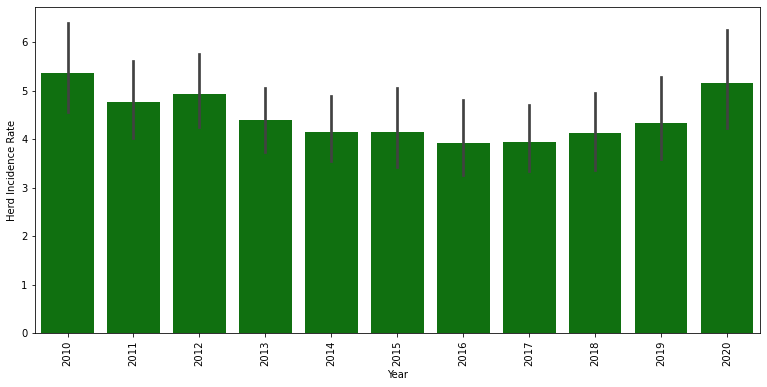

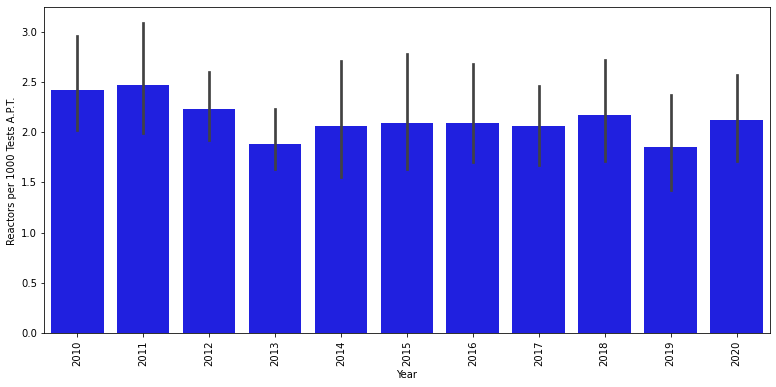

In [11]:
axis = seaborn.barplot(data=county_bovine_tuberculosis_dataframe,
                       color="g",
                       x=YEAR,
                       y=HERD_INCIDENCE_RATE)
axis.set_xticklabels(labels=axis.get_xticklabels(), rotation=90)
pyplot.show()
display_caption(f"Bar plot of {HERD_INCIDENCE_RATE} against Year")

axis = seaborn.barplot(data=county_bovine_tuberculosis_dataframe,
                       color="b",
                       x=YEAR,
                       y=REACTORS_PER_1000_TESTS_APT)
axis.set_xticklabels(labels=axis.get_xticklabels(), rotation=90)
pyplot.show()
display_caption(f"Bar plot of {REACTORS_PER_1000_TESTS_APT} against Year")

### Measures of Variability

#### Inter-quartile Range

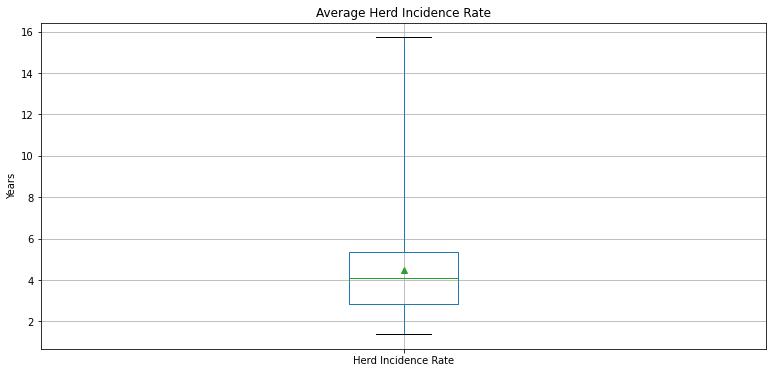

In [12]:
box = county_bovine_tuberculosis_dataframe.boxplot([HERD_INCIDENCE_RATE],
                                                   showmeans=True,
                                                   whis=99)
pyplot.title(f"Average {HERD_INCIDENCE_RATE}")
pyplot.ylabel("Years")
pyplot.show()
display_caption(f"{HERD_INCIDENCE_RATE} Box plot")

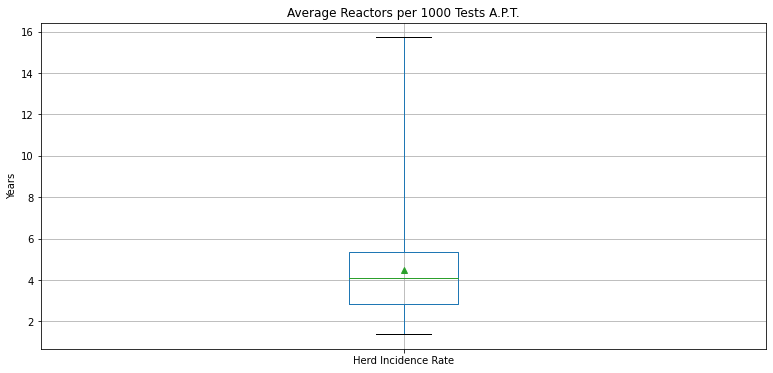

In [13]:
box = county_bovine_tuberculosis_dataframe.boxplot([HERD_INCIDENCE_RATE],
                                                   showmeans=True,
                                                   whis=99)
pyplot.title(f"Average {REACTORS_PER_1000_TESTS_APT}")
pyplot.ylabel("Years")
pyplot.show()
display_caption(f"{REACTORS_PER_1000_TESTS_APT} Box plot")

### Standard Deviation

In [14]:
county_bovine_tuberculosis_dataframe[[
    HERD_INCIDENCE_RATE, HERDS_TESTED, REACTORS_PER_1000_TESTS_APT
]].std()

Herd Incidence Rate                  2.203510
Herds Tested                      2426.144887
Reactors per 1000 Tests A.P.T.       1.317926
dtype: float64

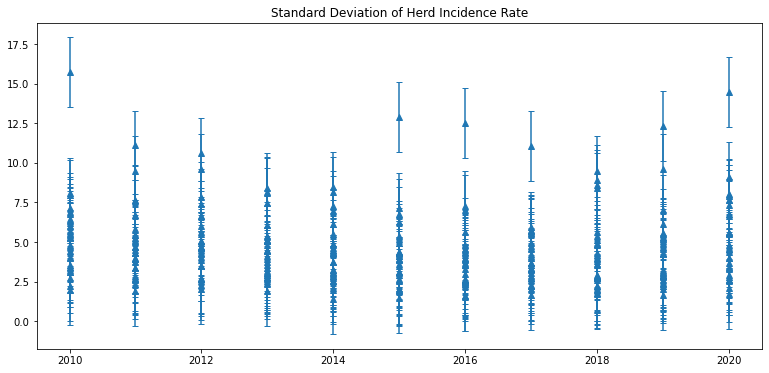

In [15]:
pyplot.errorbar(
    county_bovine_tuberculosis_dataframe[YEAR],
    county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE],
    county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE].std(),
    linestyle='None',
    marker='^',
    capsize=3)
title = f"Standard Deviation of {HERD_INCIDENCE_RATE}"
pyplot.title(title)
pyplot.show()
display_caption(title)

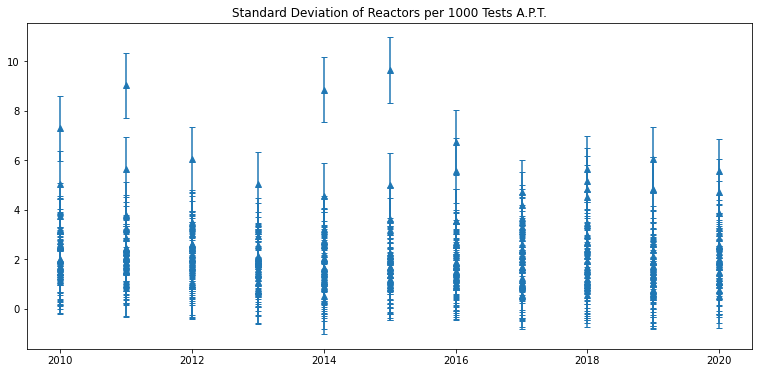

In [16]:
pyplot.errorbar(
    county_bovine_tuberculosis_dataframe[YEAR],
    county_bovine_tuberculosis_dataframe[REACTORS_PER_1000_TESTS_APT],
    county_bovine_tuberculosis_dataframe[REACTORS_PER_1000_TESTS_APT].std(),
    linestyle='None',
    marker='^',
    capsize=3)
title = f"Standard Deviation of {REACTORS_PER_1000_TESTS_APT}"
pyplot.title(title)
pyplot.show()
display_caption(title)

### Distribution

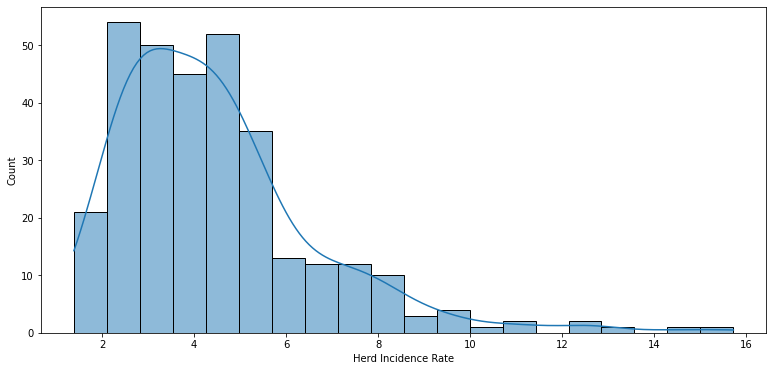

In [17]:
_ = seaborn.histplot(
    data=county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE], kde=True)
pyplot.show()
display_caption(f"{HERD_INCIDENCE_RATE} Distribution")

### Normal Distribution

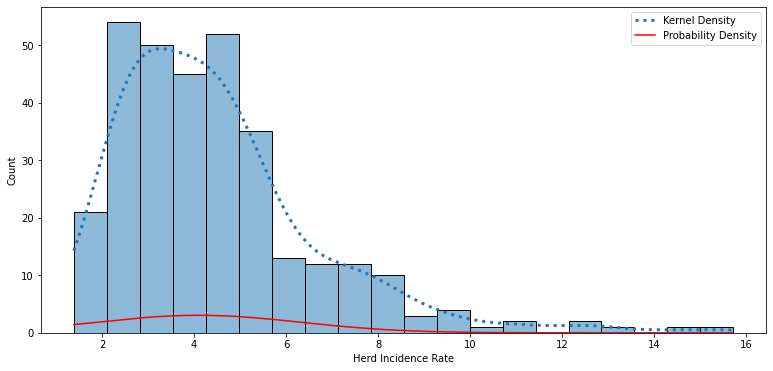

In [18]:
data = county_bovine_tuberculosis_dataframe[HERD_INCIDENCE_RATE]
axis = seaborn.histplot(data=data,
                        kde=True,
                        line_kws={
                            'linestyle': ':',
                            'linewidth': 3
                        })

median = data.median()
x = numpy.arange(data.min(), data.max(), 0.1)
y = scipy.stats.norm.pdf(x, scale=data.std(), loc=median)
y = [probability * median**2 for probability in y]  #scaling
axis.plot(x, y, c='r')
pyplot.legend(labels=["Kernel Density", "Probability Density"])
pyplot.show()
display_caption(f"{HERD_INCIDENCE_RATE} Normal Distribution")

### After removing outliers

In [19]:
eda_reports.report_outliers_columns(county_bovine_tuberculosis_dataframe)

In [20]:
expected_herd_incidence_dataframe = eda.get_expected_range_dataframe(
    county_bovine_tuberculosis_dataframe,
    HERD_INCIDENCE_RATE)[[YEAR, HERD_INCIDENCE_RATE]]
print(expected_herd_incidence_dataframe.shape[0], "expected values found")
expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE].describe()

307 expected values found


count    307.000000
mean       4.201238
std        1.685456
min        1.390000
25%        2.830000
50%        3.980000
75%        5.130000
max        9.110000
Name: Herd Incidence Rate, dtype: float64

## Normality Test

In [21]:
import pingouin as pg

# Test Normality via Shapiro-Wilk test of Normality
print('Shapiro-Wilk test of Normality \n',
      pg.normality(expected_herd_incidence_dataframe),
      '\n')

Shapiro-Wilk test of Normality 
                             W          pval  normal
Year                 0.939720  7.381994e-10   False
Herd Incidence Rate  0.949039  7.916918e-09   False 



In [22]:
expected_reactors_per_1000_dataframe = eda.get_expected_range_dataframe(
    county_bovine_tuberculosis_dataframe,
    REACTORS_PER_1000_TESTS_APT)[[YEAR, REACTORS_PER_1000_TESTS_APT]]
print(expected_reactors_per_1000_dataframe.shape[0], "expected values found")
expected_reactors_per_1000_dataframe[REACTORS_PER_1000_TESTS_APT].describe()

297 expected values found


count    297.000000
mean       1.854916
std        0.766436
min        0.290000
25%        1.270000
50%        1.790000
75%        2.350000
max        4.190000
Name: Reactors per 1000 Tests A.P.T., dtype: float64

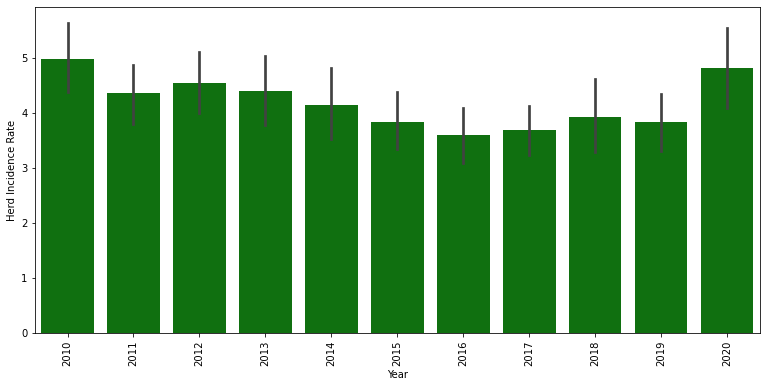

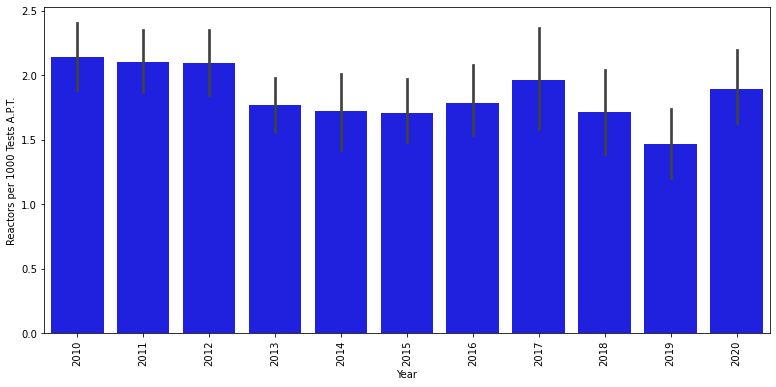

In [23]:
axis = seaborn.barplot(data=expected_herd_incidence_dataframe,
                       color="g",
                       x=YEAR,
                       y=HERD_INCIDENCE_RATE)
axis.set_xticklabels(labels=axis.get_xticklabels(), rotation=90)
pyplot.show()
display_caption(f"Bar plot of {HERD_INCIDENCE_RATE} against Year")

axis = seaborn.barplot(data=expected_reactors_per_1000_dataframe,
                       color="b",
                       x=YEAR,
                       y=REACTORS_PER_1000_TESTS_APT)
axis.set_xticklabels(labels=axis.get_xticklabels(), rotation=90)
pyplot.show()
display_caption(f"Bar plot of {REACTORS_PER_1000_TESTS_APT} against Year")

### Distribution

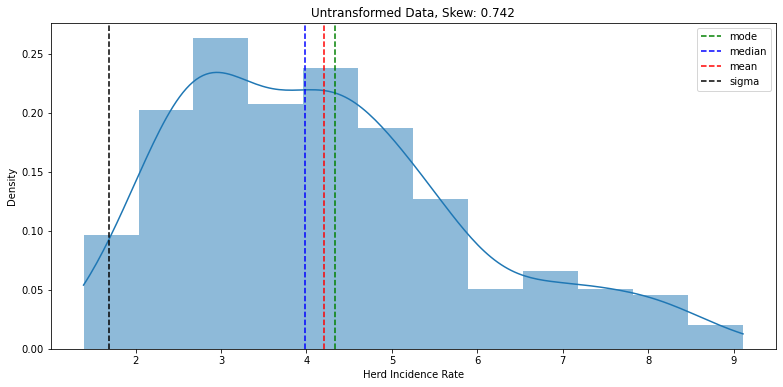

In [24]:
sigma = expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE].std()
mean = expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE].mean()
median = expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE].median()
mode = expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE].mode().to_numpy()

pyplot.title(f'Untransformed Data, Skew: {stats.skew(expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE]):.3f}')
seaborn.histplot(expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE], stat="density", linewidth=0, kde=True)
pyplot.axvline(mode, linestyle='--', color='green', label='mode')
pyplot.axvline(median, linestyle='--', color='blue', label='median')
pyplot.axvline(mean, linestyle='--', color='red', label='mean')
pyplot.axvline(sigma, linestyle='--', color='black', label='sigma')
pyplot.legend();

<AxesSubplot:title={'center':'Yeo Johnson, Skew: 0.009'}, ylabel='Density'>

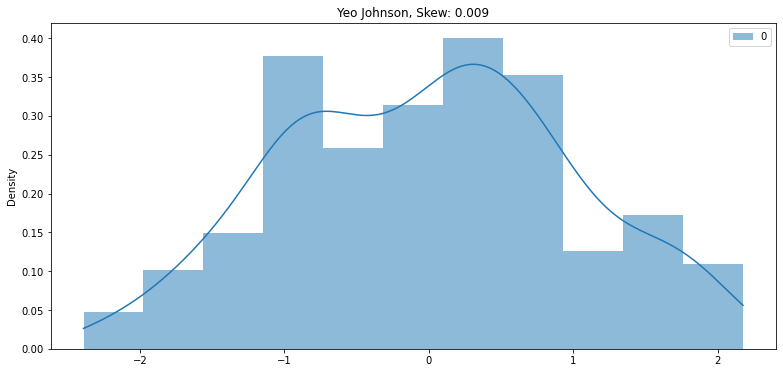

In [25]:
#Yeo-Johnson
power_transformer = preprocessing.PowerTransformer()
ptd = power_transformer.fit_transform(
    expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE].to_numpy().reshape(
        -1, 1))
pyplot.title(f'Yeo Johnson, Skew: {stats.skew(ptd.squeeze()):.3f}')
seaborn.histplot(ptd, stat="density", linewidth=0, kde=True)

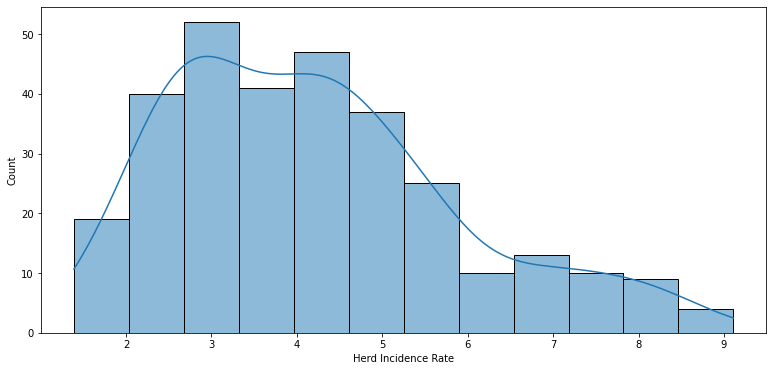

In [26]:
_ = seaborn.histplot(
    data=expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE], kde=True)
pyplot.show()
display_caption(f"{HERD_INCIDENCE_RATE} Distribution")

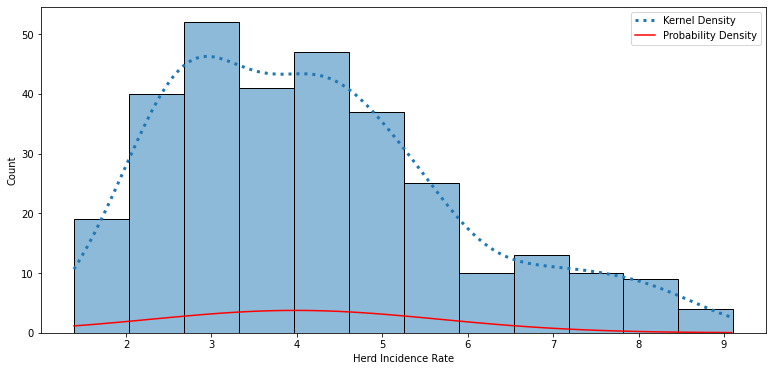

In [27]:
data = expected_herd_incidence_dataframe[HERD_INCIDENCE_RATE]
axis = seaborn.histplot(data=data,
                        kde=True,
                        line_kws={
                            'linestyle': ':',
                            'linewidth': 3
                        })

median = data.median()
x = numpy.arange(data.min(), data.max(), 0.1)
y = scipy.stats.norm.pdf(x, scale=data.std(), loc=median)
y = [probability * median**2 for probability in y]  #scaling
axis.plot(x, y, c='r')
pyplot.legend(labels=["Kernel Density", "Probability Density"])
pyplot.show()
display_caption(f"{HERD_INCIDENCE_RATE} Normal Distribution")